In [ ]:
# !pip install pulp
# !pip install networkx
# !pip install matplotlib

# Introduction

The max clique problem is a graph problem where the objective is to find the subgraph $G'$ within graph $G$ such that $G'$ is the largest subgraph where every two nodes are connected by an edge.

This problem can be applied to any context. For example, if the nodes are people and an edge between two nodes denotes whether two people know each other, then a max clique would be the large group of people such that every two people know each other.

One way this problem can be solved is by using integer programming.

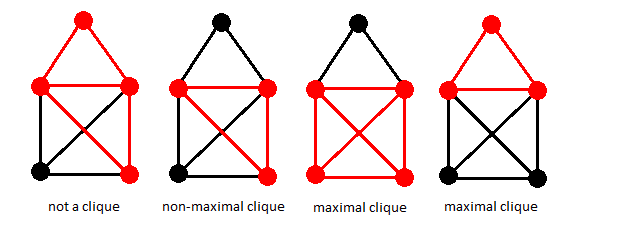



## Integer Program Formulation

In this Integer Program the decision variables $x_i$ are binary indicators where $x_i = 1$ if node i is included in the clique and $x_i = 0$ otherwise. The objective is to maximize the sum of the x variables. If left unconstrained, the program will assign $x_i = 1, \forall i$. However, a constraint is imposed where if node i and node j are not connected by an edge, only 1 of the nodes can be included in the clique. The program has a constraint for every two pair of nodes. This constraint limits which $x_i$'s can be set to one. Thus, the program maximizes the amount of nodes that are set to 1 but must satisfy that they are all connected by an edge. Thus this program solves the max clique problem!

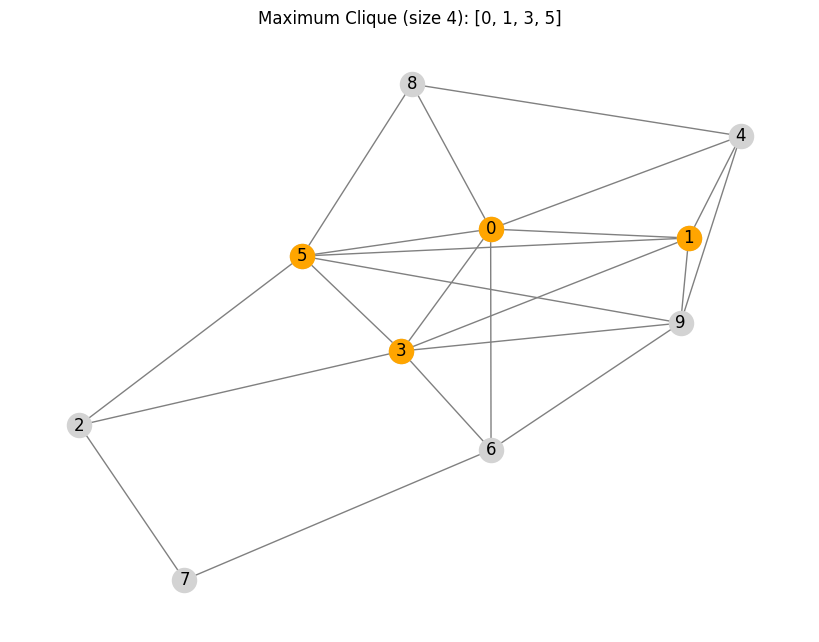

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, lpSum, LpMaximize, LpBinary, PULP_CBC_CMD

def solve_max_clique(graph):
    #Objective is to Maximize
    prob = LpProblem("Max_Clique", LpMaximize)

    x = {v: LpVariable(f"x_{v}", cat=LpBinary) for v in graph.nodes()}

    # Objective Function is to Sum all X's
    prob += lpSum(x[v] for v in graph.nodes())

    # Add a constraint for every pair of nodes
    for u in graph.nodes():
        for v in graph.nodes():
            if u < v and not graph.has_edge(u, v):
                # This constraint ensures that if two nodes
                # are not connected, at most 1 node of the two
                # can be included in the clique
                prob += x[u] + x[v] <= 1

    prob.solve(PULP_CBC_CMD(msg=0))

    clique = [v for v in graph.nodes() if x[v].varValue == 1]
    return clique

def visualize_clique(graph, clique):
    pos = nx.spring_layout(graph, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_color='lightgray', edge_color='gray')
    nx.draw_networkx_nodes(graph, pos, nodelist=clique, node_color='orange')
    plt.title(f"Maximum Clique (size {len(clique)}): {clique}")
    plt.show()

G = nx.generators.random_graphs.erdos_renyi_graph(n=10, p=0.5)

# Solve and visualize
clique = solve_max_clique(G)
visualize_clique(G, clique)

The code above generates a randomized graph with 10 nodes and then identifies the max clique within that graph.